## Keras, Adam optimizer, Neural Network's hyperparameters

The task is to create a neural network using Keras mechanisms that will classify products from the fashion_mnist dataset.

You are required to propose your own network architecture. The accuracy of the simplest, yet adequate neural network is approximately 91%. The accuracy of your model should not be lower than this value. To achieve such results, you will need to experiment with the network's hyperparameters:
- number of layers;
- number of neurons;
- activation functions;
- number of epochs;
- batch size;
- choice of optimizer;
- various regularization techniques, etc.

Use the learned techniques for detecting neural network training problems, and then experiment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import optimizers, losses
from sklearn.metrics import classification_report

In [2]:
# Loading the `fashion_mnist` Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Each image has a corresponding label. Since the class names are not included in the dataset, we will store them here to use later when displaying the images.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

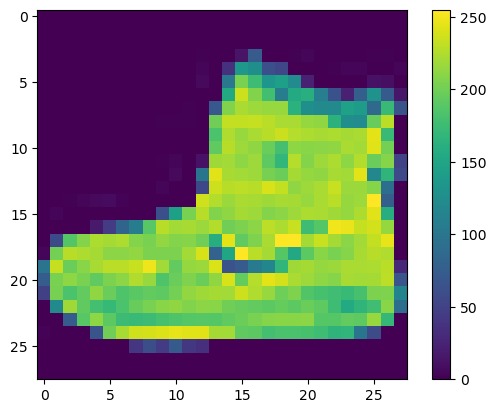

In [4]:
# Let's display the first element of the dataset
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

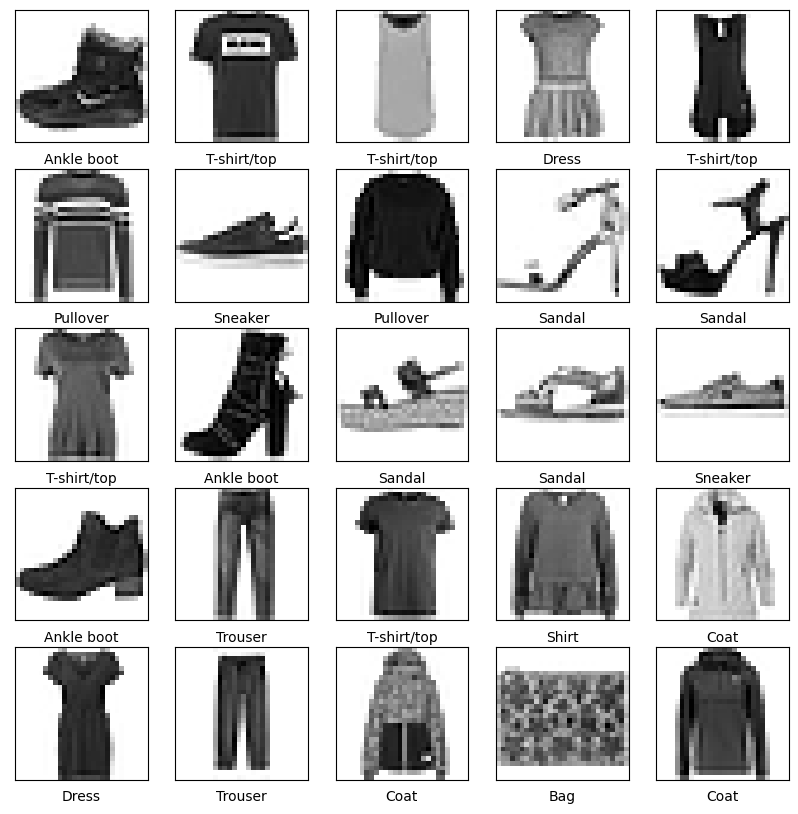

In [6]:
# Let's display the first 25 images from the training set to ensure the data is in the correct format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [7]:
# Building the Model
# We start with a simple model and will gradually add layers (if needed) and experiment with hyperparameters
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='sigmoid'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

In [8]:
# Before training the model, we compile it. This includes choosing the optimizer, loss function, and metrics for evaluation
model.compile(optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Training the model on the training set
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6165 - accuracy: 0.7886 - val_loss: 0.4209 - val_accuracy: 0.8459
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4028 - accuracy: 0.8557 - val_loss: 0.3807 - val_accuracy: 0.8650
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3607 - accuracy: 0.8691 - val_loss: 0.3613 - val_accuracy: 0.8713
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3337 - accuracy: 0.8783 - val_loss: 0.3509 - val_accuracy: 0.8704
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.8856 - val_loss: 0.3406 - val_accuracy: 0.8752
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2949 - accuracy: 0.8904 - val_loss: 0.3221 - val_accuracy: 0.8822
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2835 - accuracy: 0.8942 - val_loss: 0.3196 - val_accuracy: 0.8842
Epoch 

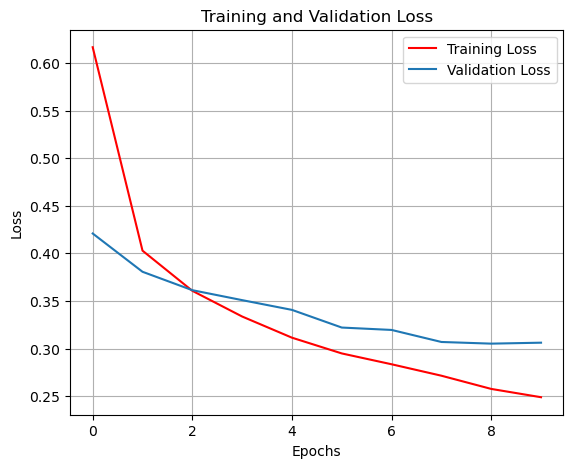

In [10]:
# Visualization of the obtained data
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()

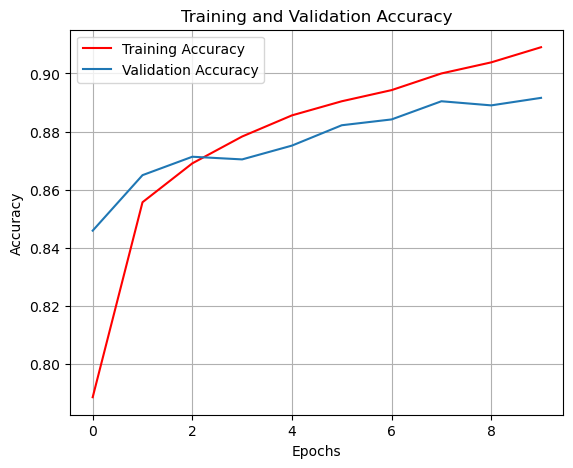

In [11]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

As we can see, our model has sufficiently adequate accuracy and loss values.
Now let's take a look at the quality metrics for each class.

In [12]:
y_pred_classes = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.76      0.83      0.79      1000
           3       0.90      0.87      0.88      1000
           4       0.75      0.86      0.80      1000
           5       0.97      0.96      0.97      1000
           6       0.76      0.62      0.68      1000
           7       0.93      0.96      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [13]:
# Prediction
# Defining functions to plot the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [14]:
# Making predictions
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


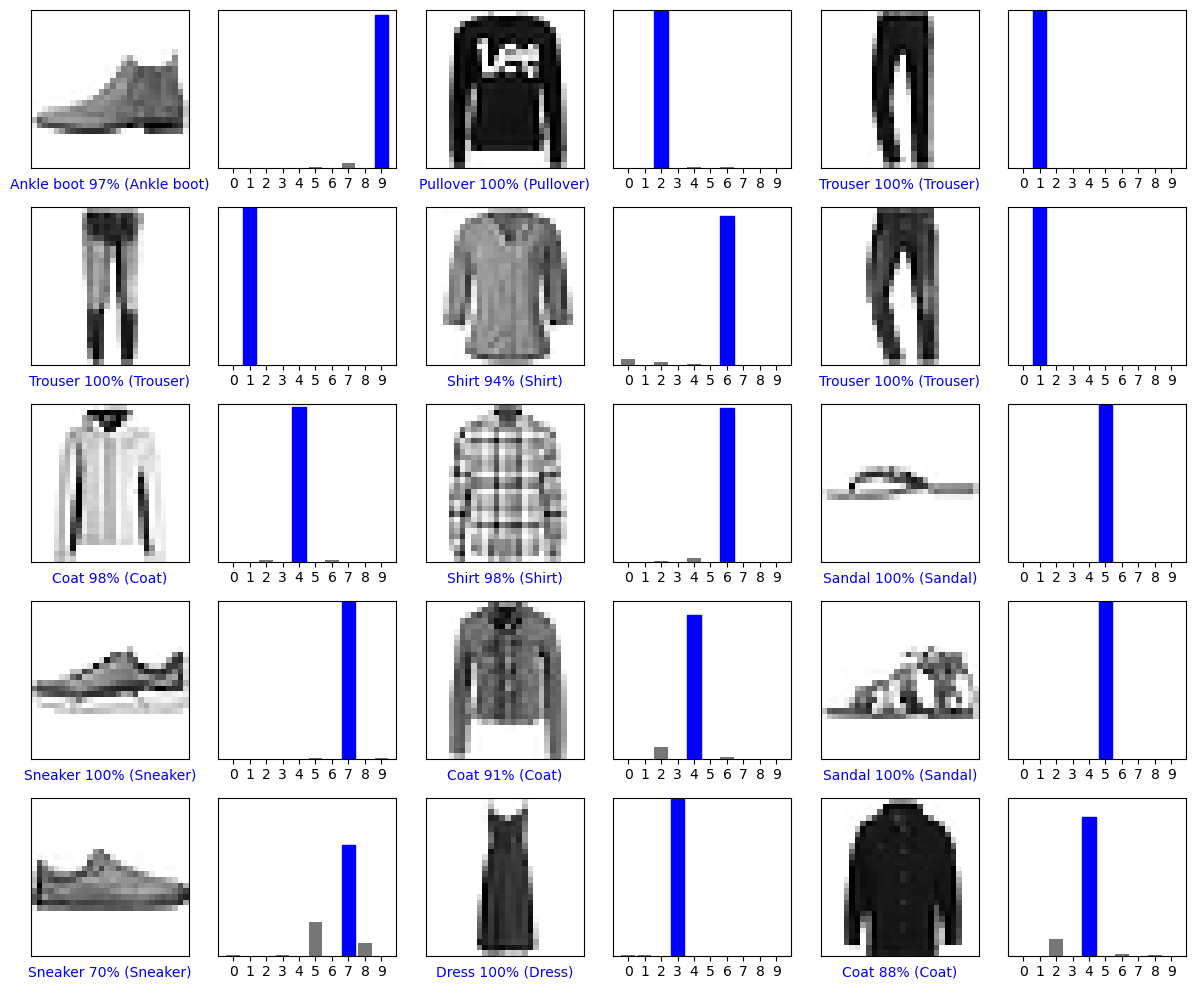

In [15]:
# Let's plot a few images with their predictions
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Thus, a neural network with three layers and activation functions relu, sigmoid, and softmax has been created. Dropout(0.1) has also been added to prevent overfitting. The `Adam optimizer` and `sparse_categorical_crossentropy` loss function were used. The model was trained for 10 epochs. The results were visualized, and predictions were made. The training accuracy achieved was 90.9%, and the validation accuracy was 89.1%.

As we can see, our model has learned quite well and can adequately classify clothing types. In our case, we achieved 15 out of 15 correct predictions, although for the 13th image, the network predicted it as a sneaker, but with only a 70% probability. It is evident that the model can be uncertain in its predictions, which is normal given the current validation accuracy.